In [5]:
from docx import Document
import os

In [6]:
def extract_text_from_docx(docx_path):
    doc=Document(docx_path)
    text=''
    for para in doc.paragraphs:
        text+=para.text+'\n'
    return text

In [7]:
resume_folder =r"C:\Users\apkou\Desktop\A Pranav Koundinya\DATASETS\archive\Resumes"
resume_texts={}
for filename in os.listdir(resume_folder):
    if filename.endswith(".docx"):
        docx_path=os.path.join(resume_folder,filename)
        resume_texts[filename]=extract_text_from_docx(docx_path)

In [8]:
for filename,text in list(resume_texts.items())[:5]:
    print(f"--- Resume:{filename} ---")
    print(text[:500])
    print("\n")

--- Resume:Abiral_Pandey_Fullstack_Java.docx ---
Name: Abiral Pandey
Email: abiral.pandey88@gmail.com
Phone: 940-242-3303
Current Location: Woonsocket, Rhode Island
Visa Status: US Citizen

SUMMARY:
Dynamic individual with 6 years of software development experience in design, development, deployment, maintenance, production and support of web - based and Client-Server business applications using OOP and Java/J2EE technologies.
Exposure to all phases of Software Development Life Cycle(SDLC) using Agile, RUP, Waterfall.
Designed and developed we


--- Resume:Achyuth Resume_8.docx ---
Achyuth
540-999-8048
achyuth.java88@gmail.com

OBJECTIVE:
Around 8 years of strong software experience in design, development, analysis and deployment of web-based and Client-Server business applications using Object Oriented Analysis and Design (OOAD, OOPS) and Java/JEE/J2EE technologies in Financial, Insurance, and Health Sector Domain with Software Development Life Cycle (SDLC).

PROFESSIONAL SUMMARY:
Act

In [9]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [10]:
def preprocess_text(text):
    text=re.sub(r'[^A-Za-z\s]','',text)
    text=text.lower()
    text=' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

In [11]:
preprocessed_resumes={filename:preprocess_text(text) for filename,text in resume_texts.items()}
for filename,text in list(preprocessed_resumes.items())[:5]:
    print(f"---Processed Resume:{filename}---")
    print(text[:500])
    print("\n")

---Processed Resume:Abiral_Pandey_Fullstack_Java.docx---
abiral pandey email abiralpandeygmailcom phone current location woonsocket rhode island visa status citizen summary dynamic individual years software development experience design development deployment maintenance production support web based clientserver business applications using oop javajee technologies exposure phases software development life cyclesdlc using agile rup waterfall designed developed web ui screen using angularjs developed angularjs controllers services filters directives var


---Processed Resume:Achyuth Resume_8.docx---
achyuth achyuthjavagmailcom objective years strong software experience design development analysis deployment webbased clientserver business applications using object oriented analysis design ooad oops javajeejee technologies financial insurance health sector domain software development life cycle sdlc professional summary actively involved phase software development life cycle sdlc expertise

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf=TfidfVectorizer(max_features=5000)
X_resumes=tfidf.fit_transform(preprocessed_resumes.values())

In [14]:
import pandas as pd
features_df=pd.DataFrame(X_resumes.toarray(),columns=tfidf.get_feature_names_out())
print(features_df.head())

   abbvie  abilities   ability      able  absence  abstract  abstraction  \
0     0.0    0.00000  0.000000  0.000000      0.0       0.0          0.0   
1     0.0    0.00000  0.000000  0.000000      0.0       0.0          0.0   
2     0.0    0.00000  0.000000  0.032012      0.0       0.0          0.0   
3     0.0    0.00000  0.025645  0.000000      0.0       0.0          0.0   
4     0.0    0.01225  0.006218  0.000000      0.0       0.0          0.0   

         ac  aca  academic  ...  yeoman     york   yr  yrs  yui  zend  zomato  \
0  0.000000  0.0       0.0  ...     0.0  0.00000  0.0  0.0  0.0   0.0     0.0   
1  0.000000  0.0       0.0  ...     0.0  0.00000  0.0  0.0  0.0   0.0     0.0   
2  0.000000  0.0       0.0  ...     0.0  0.00000  0.0  0.0  0.0   0.0     0.0   
3  0.000000  0.0       0.0  ...     0.0  0.00000  0.0  0.0  0.0   0.0     0.0   
4  0.015302  0.0       0.0  ...     0.0  0.00913  0.0  0.0  0.0   0.0     0.0   

      zones  zookeeper  zuul  
0  0.000000        0.0   

In [192]:
np.save("res_tfidf.npy",features_df)

In [16]:
from sentence_transformers import SentenceTransformer

In [17]:
model=SentenceTransformer('all-MiniLM-L6-v2')
resume_embeddings={filename:model.encode(text) for filename,text in resume_texts.items()}
embedding_df=pd.DataFrame.from_dict(resume_embeddings,orient='index')
print(embedding_df.head())

                                        0         1         2         3    \
Abiral_Pandey_Fullstack_Java.docx -0.143301  0.017869 -0.080122 -0.013082   
Achyuth Resume_8.docx             -0.145714  0.040138 -0.068467 -0.007959   
Adelina_Erimia_PMP1.docx          -0.067612 -0.014115 -0.013945  0.021013   
Adhi Gopalam - SM.docx             0.017046  0.043795 -0.018089  0.021568   
AjayKumar.docx                    -0.014758  0.043306 -0.071428 -0.010469   

                                        4         5         6         7    \
Abiral_Pandey_Fullstack_Java.docx -0.017539 -0.051012  0.017637  0.021621   
Achyuth Resume_8.docx              0.041752 -0.032795 -0.024080  0.064539   
Adelina_Erimia_PMP1.docx          -0.009826 -0.014540  0.028896  0.044637   
Adhi Gopalam - SM.docx            -0.000590 -0.011436  0.017332  0.051832   
AjayKumar.docx                     0.036185  0.004800  0.010594  0.066011   

                                        8         9    ...       374  \
Ab

In [18]:
embedding_df.to_csv("resumeSBERT.csv", index=False)

In [19]:
print(embedding_df.shape[0])

224


In [148]:
jd_df=pd.read_csv("job_title_des.csv")
print(jd_df.head())
print("columns in dataset:",jd_df.columns)
if 'Job Description' not in jd_df.columns:
    raise ValueError("The dataset doesn't contain a column named 'job_description'.")

   Unnamed: 0             Job Title  \
0           0     Flutter Developer   
1           1      Django Developer   
2           2      Machine Learning   
3           3         iOS Developer   
4           4  Full Stack Developer   

                                     Job Description  
0  We are looking for hire experts flutter develo...  
1  PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...  
2  Data Scientist (Contractor)\n\nBangalore, IN\n...  
3  JOB DESCRIPTION:\n\nStrong framework outside o...  
4  job responsibility full stack engineer – react...  
columns in dataset: Index(['Unnamed: 0', 'Job Title', 'Job Description'], dtype='object')


In [172]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [174]:
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()
def clean_text(text):
    text=text.lower()
    text=re.sub(r'[^a-z\s]','',text)
    text=re.sub(r'\s+',' ',text).strip()
    words=word_tokenize(text)
    words=[word for word in words if word not in stop_words]
    words=[lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [176]:
jd_df['cleaned_jd']=jd_df['Job Description'].apply(clean_text)

In [178]:
print("Cleaned job description sample:",jd_df['cleaned_jd'].head())

Cleaned job description sample: 0    looking hire expert flutter developer eligible...
1    pythondjango developerlead job codepdj strong ...
2    data scientist contractor bangalore responsibi...
3    job description strong framework outside io al...
4    job responsibility full stack engineer react r...
Name: cleaned_jd, dtype: object


In [180]:
jd_df.to_csv("jd.csv",index=False)

In [182]:
import numpy as np

In [184]:
if 'cleaned_jd' not in jd_df.columns:
    raise ValueError("the dataset doesn't contain a column named 'cleaned_jd'. ")

In [202]:
tfidf_vectorizer=TfidfVectorizer(max_features=5000)
tfidf_embeddings=tfidf_vectorizer.fit_transform(jd_df['cleaned_jd']).toarray()
print("shape:",tfidf_embeddings.shape)

shape: (2277, 5000)


In [204]:
np.save("jd_tfidf.npy",tfidf_embeddings)

In [206]:
resume_embeddings=np.load("res_tfidf.npy")
jd_embeddings=np.load("jd_tfidf.npy")
num=10
np.random.seed(42)

In [208]:
pairs=[]
labels=[]
for resume_idx, resume_emb in enumerate(resume_embeddings):
    sampled_jd_indices=np.random.choice(len(jd_embeddings),num,replace=False)
    for jd_idx in sampled_jd_indices:
        pairs.append((resume_emb,jd_embeddings[jd_idx]))
        labels.append(np.random.choice([0,1]))

In [210]:
pairs=np.array(pairs,dtype=object)
labels=np.array(labels)
print(f"Generated {len(pairs)} pairs.")
print(f"First pair shape: Resume - {pairs[0][0].shape}, Job Description - {pairs[0][1].shape}")

Generated 2240 pairs.
First pair shape: Resume - (5000,), Job Description - (5000,)


In [212]:
from sklearn.metrics.pairwise import cosine_similarity

In [214]:
similarity_scores = []
for pair in pairs:
    resume_emb, jd_emb = pair    
    similarity = cosine_similarity(resume_emb.reshape(1, -1), jd_emb.reshape(1, -1))[0][0]
    similarity_scores.append(similarity)
similarity_scores = np.array(similarity_scores)
print(f"Computed {len(similarity_scores)} similarity scores.")

Computed 2240 similarity scores.


In [216]:
from sklearn.model_selection import train_test_split

In [220]:
labels=np.array(labels)
X_train,X_test,y_train,y_test=train_test_split(similarity_scores,labels,test_size=0.3,random_state=42)
print(f"Training data: {len(X_train)} pairs")
print(f"Test data: {len(X_test)} pairs")

Training data: 1568 pairs
Test data: 672 pairs


In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = LogisticRegression(class_weight='balanced')
model.fit(X_train.reshape(-1, 1), y_train)
y_pred = model.predict(X_test.reshape(-1, 1))
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.5432
Confusion Matrix:
[[159 174]
 [133 206]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.48      0.51       333
           1       0.54      0.61      0.57       339

    accuracy                           0.54       672
   macro avg       0.54      0.54      0.54       672
weighted avg       0.54      0.54      0.54       672



In [12]:
#optimized approach
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

job_descriptions_df = pd.read_csv('job_title_des.csv')  
job_descriptions = job_descriptions_df['Job Description'].values

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  
X = vectorizer.fit_transform(job_descriptions)

n_clusters = 13
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
job_descriptions_df['Cluster'] = kmeans.fit_predict(X)

representative_job_descriptions = []
for i in range(n_clusters):
    cluster_indices = job_descriptions_df[job_descriptions_df['Cluster'] == i].index
    distances = np.linalg.norm(X[cluster_indices] - kmeans.cluster_centers_[i], axis=1)
    representative_index = cluster_indices[np.argmin(distances)]
    representative_job_descriptions.append(job_descriptions_df.loc[representative_index])
    
reduced_job_descriptions_df = pd.DataFrame(representative_job_descriptions, columns=['Job Title', 'Job Description'])
reduced_job_descriptions_df.to_csv('reduced_job_descriptions.csv', index=False)

print(f"Reduced job descriptions dataset saved with {len(reduced_job_descriptions_df)} job descriptions.")


Reduced job descriptions dataset saved with 13 job descriptions.


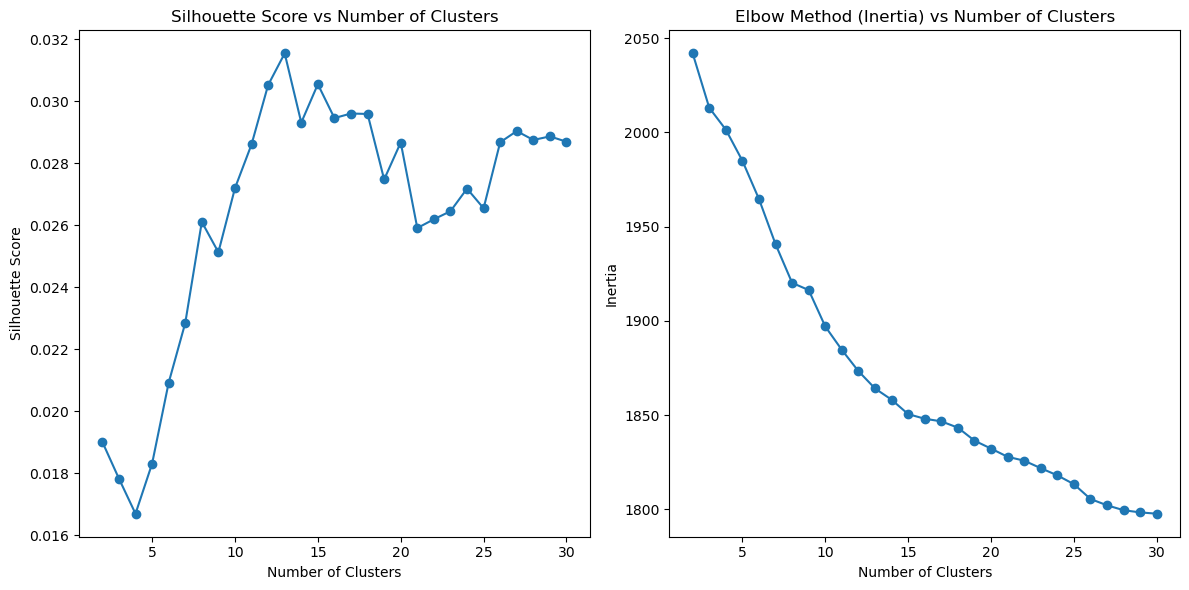

Best Silhouette Score: 0.03154822375653299 for 13 clusters


In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming jd_embeddings is your job descriptions embeddings array
# Number of clusters to try
cluster_range = range(2, 31)  # Trying between 2 to 30 clusters

# Initialize lists to store results
silhouette_scores = []
inertia_values = []

# Try clustering for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)  # Fit KMeans to job description embeddings
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Store inertia (sum of squared distances)
    inertia_values.append(kmeans.inertia_)

# Plot the Silhouette Scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Plot the Elbow Method (Inertia vs Number of Clusters)
plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method (Inertia) vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

# Print the best silhouette score and the corresponding number of clusters
best_silhouette_score = max(silhouette_scores)
best_silhouette_n_clusters = cluster_range[silhouette_scores.index(best_silhouette_score)]

print(f"Best Silhouette Score: {best_silhouette_score} for {best_silhouette_n_clusters} clusters")


In [48]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have the following:
# - resume_embeddings: 228 resumes with their embeddings (shape: (228, embedding_dim))
# - jd_clustered_embeddings: 13 job descriptions (after clustering) (shape: (13, embedding_dim))

n_resumes = 228
n_jds = 13
embedding_dim = 5000

# Assuming these are your resume embeddings and clustered JD embeddings
resume_embeddings = np.random.rand(n_resumes, embedding_dim)  # Replace with your actual resume embeddings
jd_clustered_embeddings = np.random.rand(n_jds, embedding_dim)  # Replace with your actual clustered JD embeddings

# Generate resume and JD names
resume_names = [f"Resume_{i+1}" for i in range(n_resumes)]
jd_names = [f"JD_{i+1}" for i in range(n_jds)]

pairs = []
labels = []

similarity_threshold = 0.7525

for resume_idx, resume_emb in enumerate(resume_embeddings):
    for jd_idx, jd_emb in enumerate(jd_clustered_embeddings):
        # Get resume and JD names
        resume_name = resume_names[resume_idx]
        jd_name = jd_names[jd_idx]
        
        # Calculate cosine similarity
        similarity = cosine_similarity(resume_emb.reshape(1, -1), jd_emb.reshape(1, -1))[0][0]
        
        # Assign label based on similarity threshold
        label = 1 if similarity >= similarity_threshold else 0
        
        # Append the pair and label
        pairs.append((resume_name, jd_name, similarity))
        labels.append(label)

pairs_df = pd.DataFrame(pairs, columns=["resume_name", "jd_name", "similarity"])
pairs_df["label"] = labels

pairs_df = pairs_df[["resume_name", "jd_name","similarity", "label"]]
pairs_df.to_csv("resume_jd_pairs.csv", index=False)

print("Dataset with resume names, JD names, and labels saved as 'resume_jd_pairs.csv'.")


Dataset with resume names, JD names, and labels saved as 'resume_jd_pairs.csv'.


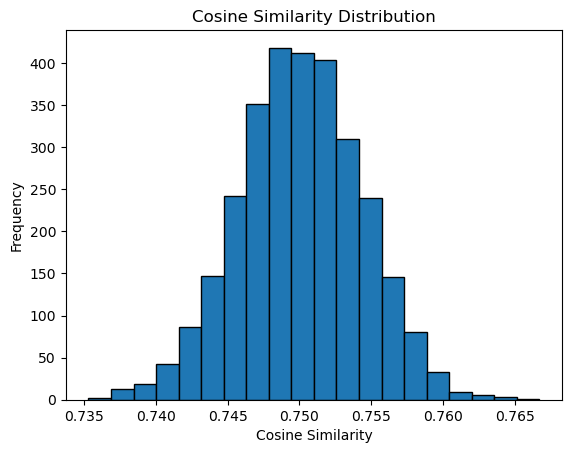

Min similarity: 0.7352921591588799
Max similarity: 0.7667199444278487
Mean similarity: 0.7500571896466377


In [32]:
import matplotlib.pyplot as plt

# Calculate cosine similarity for all pairs
similarities = [cosine_similarity(resume_emb.reshape(1, -1), jd_emb.reshape(1, -1))[0][0] 
                for resume_emb in resume_embeddings 
                for jd_emb in jd_clustered_embeddings]

# Plot the distribution of cosine similarity values
plt.hist(similarities, bins=20, edgecolor='black')
plt.title('Cosine Similarity Distribution')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

# Print summary statistics
print(f"Min similarity: {min(similarities)}")
print(f"Max similarity: {max(similarities)}")
print(f"Mean similarity: {np.mean(similarities)}")


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare the final dataset
# Assuming `fused_df` is the DataFrame containing resume_name, jd_name, similarity, and label (0 or 1)
fused_df=pd.read_csv("resume_jd_pairs.csv")
X = fused_df[['similarity']]  # or any other embeddings/features you use
y = fused_df['label']  # Labels: 0 or 1

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Feature Scaling (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Model Training (Logistic Regression as a starting point)
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Output evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9921348314606742
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       646
           1       1.00      0.97      0.99       244

    accuracy                           0.99       890
   macro avg       0.99      0.99      0.99       890
weighted avg       0.99      0.99      0.99       890

